Pandas 

Vamos analisaar a performance de estudantes usando o Pandas

In [71]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import time
import datetime 
import unittest


In [3]:
df = pd.read_csv('StudentsPerformance.csv')  # Leitura do  arquivo csv
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
type (df)  # Verifica o objeto

pandas.core.frame.DataFrame

In [5]:
# 5 Primeiras linhas

df.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# 5 ultimas linhas

df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
# Verifica a quantidade de linhas e colunas
df.shape

(1000, 8)

In [8]:
df.columns   # array com nomes das colunas

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
# Verifica linhas duplicadas

df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
# Verifica existência de NaN

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
# sumário estatístico

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
# sumário estatistico - inclusive para as variaveis categóricas

df.describe(include = 'all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [14]:
# quantidade de valores únicos em cada coluna

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
# valore únicos

df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [16]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [17]:
provas = ['main score',  'reading score', 'writing score']


In [18]:
df.sort_values(['math score']).reset_index(drop =True)    

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,19,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group D,some college,standard,completed,100,97,99
996,male,group A,some college,standard,completed,100,96,86
997,female,group E,some college,standard,none,100,92,97
998,female,group E,associate's degree,standard,none,100,100,100


In [19]:
# ordena o dataset

provas = ['math score', 'reading score', 'writing score']
df = df.sort_values(by = provas, ascending  = False)\
.reset_index(drop = True)

df



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,bachelor's degree,standard,none,100,100,100
1,male,group E,bachelor's degree,standard,completed,100,100,100
2,female,group E,associate's degree,standard,none,100,100,100
3,male,group E,associate's degree,free/reduced,completed,100,100,93
4,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
995,female,group C,some college,free/reduced,none,22,39,33
996,female,group B,some college,standard,none,19,38,32
997,female,group B,some high school,free/reduced,none,18,32,28
998,female,group B,high school,free/reduced,none,8,24,23


In [20]:
# coluna com a média adas provas

df['mean'] = df[provas].mean(axis = 1)

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
1,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
2,female,group E,associate's degree,standard,none,100,100,100,100.000000
3,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667
4,male,group D,some college,standard,completed,100,97,99,98.666667


In [24]:
# consulta maiores notas de matematetica do sexo masculino

df.query('(gender == "male") & (`test preparation course` == "none") & (`math score` >= 70)') 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
15,male,group C,associate's degree,standard,none,97,93,91,93.666667
17,male,group E,some college,standard,none,97,87,82,88.666667
23,male,group D,master's degree,standard,none,95,81,84,86.666667
26,male,group E,some high school,standard,none,94,88,78,86.666667
30,male,group E,high school,standard,none,94,73,71,79.333333
...,...,...,...,...,...,...,...,...,...
401,male,group C,high school,standard,none,70,70,65,68.333333
403,male,group B,high school,standard,none,70,65,60,65.000000
406,male,group D,some college,free/reduced,none,70,63,58,63.666667
407,male,group C,high school,standard,none,70,56,51,59.000000


In [25]:
# consulta maiores notas de matematetica do sexo feminino

df.query('(gender == "female") & (`test preparation course` == "none") & (`math score` >= 70)') 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
2,female,group E,associate's degree,standard,none,100,100,100,100.000000
6,female,group E,some college,standard,none,100,92,97,96.333333
8,female,group E,high school,standard,none,99,93,90,94.000000
10,female,group D,some college,standard,none,98,100,99,99.000000
...,...,...,...,...,...,...,...,...,...
380,female,group D,associate's degree,standard,none,71,71,74,72.000000
381,female,group E,some college,standard,none,71,70,76,72.333333
392,female,group E,associate's degree,free/reduced,none,70,84,81,78.333333
395,female,group B,some college,standard,none,70,75,78,74.333333


In [30]:
df[(df.gender == 'male') & (df['test preparation course'] == 'none') & (df['math score'] >= 70)] 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
15,male,group C,associate's degree,standard,none,97,93,91,93.666667
17,male,group E,some college,standard,none,97,87,82,88.666667
23,male,group D,master's degree,standard,none,95,81,84,86.666667
26,male,group E,some high school,standard,none,94,88,78,86.666667
30,male,group E,high school,standard,none,94,73,71,79.333333
...,...,...,...,...,...,...,...,...,...
401,male,group C,high school,standard,none,70,70,65,68.333333
403,male,group B,high school,standard,none,70,65,60,65.000000
406,male,group D,some college,free/reduced,none,70,63,58,63.666667
407,male,group C,high school,standard,none,70,56,51,59.000000


In [32]:
df.loc[(df.gender == 'male') & (df['test preparation course'] == 'none') & (df['math score'] >= 70)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
15,male,group C,associate's degree,standard,none,97,93,91,93.666667
17,male,group E,some college,standard,none,97,87,82,88.666667
23,male,group D,master's degree,standard,none,95,81,84,86.666667
26,male,group E,some high school,standard,none,94,88,78,86.666667
30,male,group E,high school,standard,none,94,73,71,79.333333
...,...,...,...,...,...,...,...,...,...
401,male,group C,high school,standard,none,70,70,65,68.333333
403,male,group B,high school,standard,none,70,65,60,65.000000
406,male,group D,some college,free/reduced,none,70,63,58,63.666667
407,male,group C,high school,standard,none,70,56,51,59.000000


In [36]:
import numpy as np

# agrupamento = agrupa os dados por gênero e obtém estatísticas descritivas

df.groupby(by = 'gender')[provas].agg([np.mean, np.median]).T

C:\Users\Anderson G Lignelli\AppData\Local\Temp\ipykernel_7424\4114005818.py:5: FutureWarning: The provided callable <function mean at 0x0000026230885440> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(by = 'gender')[provas].agg([np.mean, np.median]).T
C:\Users\Anderson G Lignelli\AppData\Local\Temp\ipykernel_7424\4114005818.py:5: FutureWarning: The provided callable <function median at 0x00000262309C05E0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby(by = 'gender')[provas].agg([np.mean, np.median]).T
C:\Users\Anderson G Lignelli\AppData\Local\Temp\ipykernel_7424\4114005818.py:5: FutureWarning: The provided callable <function mean at 0x0000026230885440> is currently using SeriesGroupBy.mean. In a future versio

gender                   female       male
math score    mean    63.633205  68.728216
              median  65.000000  69.000000
reading score mean    72.608108  65.473029
              median  73.000000  66.000000
writing score mean    72.467181  63.311203
              median  74.000000  64.000000

Visualização de dados com Matplolib

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
np.random.seed(7)

y = np.random.randint(low = 1, high=1500, size= 10)

y

array([ 176, 1221,  538,  503,  212,  920, 1373, 1210, 1423,  536],
      dtype=int32)

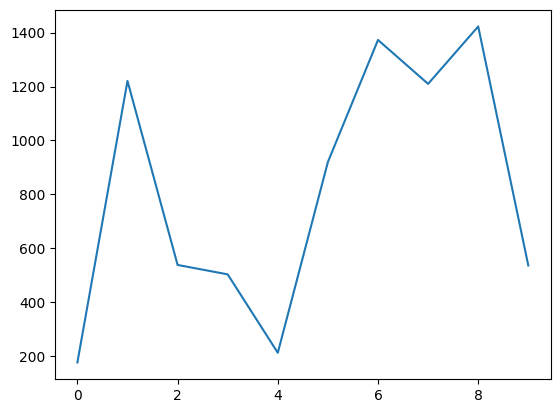

In [63]:
plt.plot(y)

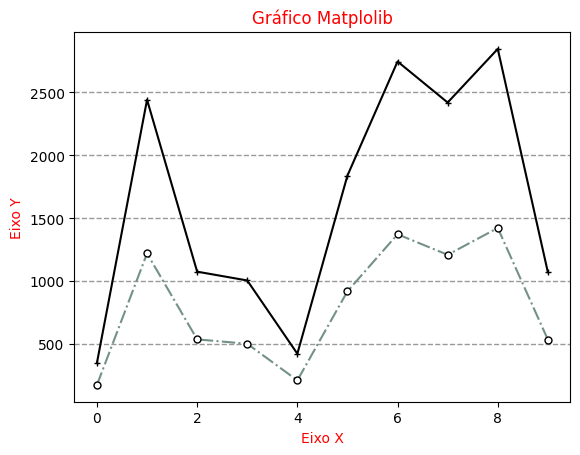

In [78]:
# insere a primeira linha no plot

plt.plot(y, color='#749187', marker='o', ms=5, mec='k', markerfacecolor='w', ls='-.')

# insere a segunda linha no plot
plt.plot(y*2, marker='+', color = 'k', ms = 5)

# rótulos

plt.xlabel('Eixo X', color = 'red',size = 10)
plt.ylabel('Eixo Y', color = 'red',size = 10)
plt.title('Gráfico Matplolib', loc= 'center', color = 'red')

# gridlines

plt.grid(axis = 'y', color = 'gray',
         linestyle = '--', linewidth = 1,
         alpha = 0.8)
plt.show()